## Regresion Polinomial & Feature engineering

In [3]:
import pandas as pd
import tensorflow as tf, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [6]:
data_set = data.values
correlacion = data.corr()
correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


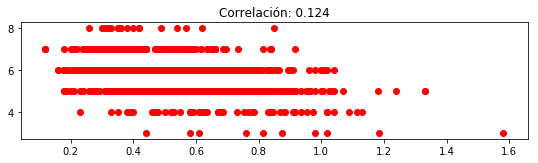

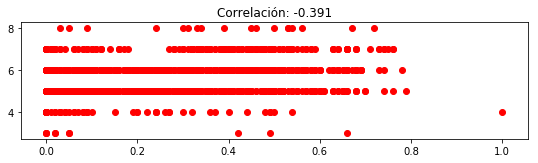

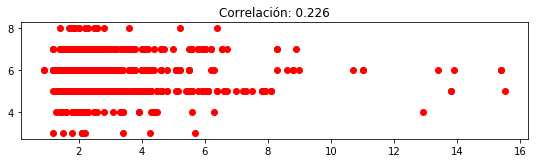

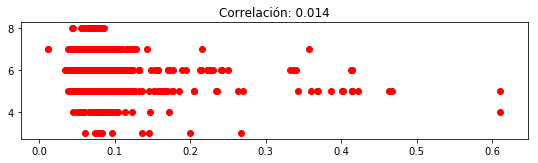

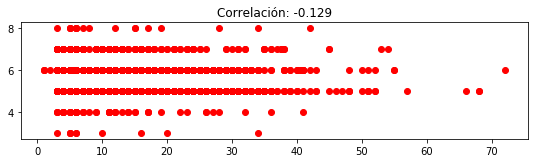

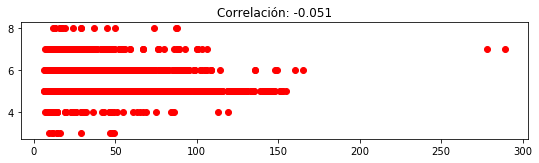

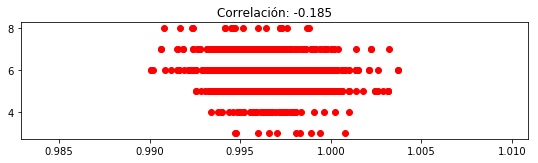

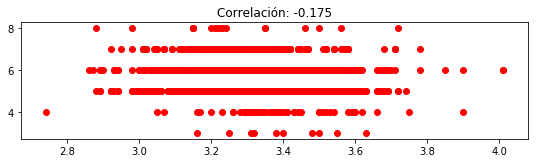

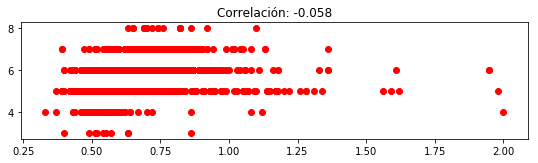

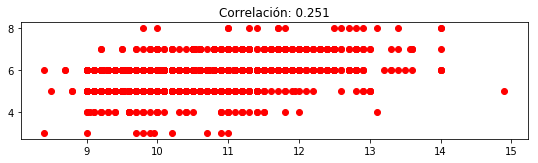

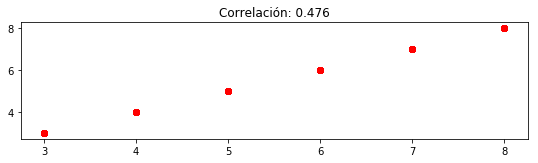

In [7]:
for z in range(1, 12):
    graficas = plt.figure(figsize = (20,15))
    plt.subplot(6,2,z)
    plt.scatter(x=data_set[::,z], y=data_set[::,11], color = "r");
    plt.title("Correlación: "+str('%.3f' % correlacion["quality"][z-1]))

In [8]:
tf.reset_default_graph()

grafo_2 = tf.Graph()
with grafo_2.as_default() as g:
    X1 = tf.placeholder("float", name = "X1")
    X2 = tf.placeholder("float", name = "X2")
    #X1_2 = tf.placeholder("float", name = "X1_2")
    #X2_2 = tf.placeholder("float", name = "X2_2")
    #X1_X2 = tf.placeholder("float", name = "X1_X2")
    Y = tf.placeholder("float", name = "Y")
    learning_rate = tf.placeholder("float", name = "learning_rate")
    W = tf.Variable([1,1,1,1,1], name = "W", dtype = "float")
    b = tf.Variable(1, name = "b", dtype = "float")

    with tf.name_scope('y_hat') as scope:
        #y_hat = tf.add(tf.add(tf.multiply(X1, W[0]), b),tf.multiply(X2,W[1]))
        y_hat = tf.multiply(X1,W[0])+tf.multiply(X2,W[1])+tf.multiply(tf.pow(X1,2),W[2])+tf.multiply(tf.pow(X2,2),W[3])+tf.multiply(tf.multiply(X1,X2),W[4])+b
    with tf.name_scope('cost') as scope:
        cost = tf.multiply(tf.reduce_mean(tf.pow(y_hat-Y,2.0)), 0.5)
        cost_summary = tf.summary.scalar("cost",cost)
    with tf.name_scope('optimizer') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
def entrenamiento(data, t_epoch, lr):
    with tf.Session(graph = grafo_2) as sess:
        writer = tf.summary.FileWriter('./graphs/lr_prueba_6_'+str("2"), sess.graph)
        sess.run(init)
        for epoch in range(t_epoch):
            sess.run(optimizer, feed_dict = {X1 : data[::,1], X2 : data[::,2], Y : data[::,0], learning_rate : lr})
            training_cost, weight, bias = sess.run([cost, W, b], feed_dict = {X1 : data[0], X2 : data[1], Y : data[2], learning_rate : lr})
            if (epoch + 1) % 50 == 0:
                c, training_cost, weight, bias = sess.run([cost_summary, cost, W, b], feed_dict = {X1 : data[0], X2 : data[1], Y : data[2], learning_rate : lr})
                writer.add_summary(c, epoch+1)
                print("Epoch", (epoch + 1), ": cost =", training_cost, "W =", weight, "b =", bias)
        writer.close()
    return [bias, weight[0], weight[1], training_cost]

In [10]:
#prediccion = entrenamiento(data_set[::,[9,10,11]], 300, 0.01)
y = data_set[::,[11]]
x1 = data_set[::,[1]]
x2 = data_set[::,[10]]
data = np.hstack((y,x1,x2))
prediccion = entrenamiento(data, 1000, 0.00001)

Epoch 50 : cost = 5577.3384 W = [ 0.9947157   0.89758635  0.9967808  -0.09333489  0.9446174 ] b = 0.9902996
Epoch 100 : cost = 5551.1636 W = [ 0.99438965  0.8966073   0.9964531  -0.09431804  0.9415999 ] b = 0.990127
Epoch 150 : cost = 5532.7964 W = [ 0.99407077  0.89574283  0.99612933 -0.0940939   0.9386474 ] b = 0.9899661
Epoch 200 : cost = 5514.522 W = [ 0.9937519   0.8948811   0.99580747 -0.09386903  0.93570226] b = 0.98980516
Epoch 250 : cost = 5496.316 W = [ 0.993433    0.8940213   0.9954856  -0.09364463  0.93276405] b = 0.9896442
Epoch 300 : cost = 5478.178 W = [ 0.99311554  0.89316326  0.99516374 -0.09342078  0.92983294] b = 0.9894833
Epoch 350 : cost = 5460.1196 W = [ 0.99279964  0.89230794  0.9948433  -0.09319752  0.9269089 ] b = 0.98932236
Epoch 400 : cost = 5442.137 W = [ 0.99248374  0.89145476  0.9945244  -0.0929748   0.9239918 ] b = 0.98916143
Epoch 450 : cost = 5424.223 W = [ 0.99216783  0.8906034   0.99420553 -0.09275258  0.9210818 ] b = 0.9890029
Epoch 500 : cost = 5406

# Grafo

<img src="grafo_1.png">
<img src="grafo_2.png">
<img src="grafo_3.png">

# Graficas

<img src="grafica.png">

# Conclusiones
***
* Los modelos que mejor se adaptan son aquellos que tienen un learning rate entre 0.0001 a 0.00001
